# ***DID BY ME HARIRAM
FOR ANY QURIES MAIL ME ( [Email](mailto:hariramhdmp@gmail.com))***

# Predicting international movie box office revenue

**The main goal of this project was to come up with a model to predict the international box office revenue of a movie based off a number of known data. A model like this could be useful for production companies or studios to decide what kinds of movies to make, for distributors to estimate how much money to dedicate to marketing, or for cinemas to know more about the types of movies that make the most money.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



In [ ]:
top1000 = pd.read_pickle('/top1000.pkl')
top1000.head()

,url_slug,worldwide_gross,domestic_gross,year,distributor,budget,release_month,rating,runtime,genre
Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_1,2797800564,858373000,2019,Walt Disney Studios Motion Pictures,356000000,4,PG-13,181,"[Action, Adventure, Drama, Sci-Fi]"
Avatar,/title/tt0499549/?ref_=bo_cso_table_2,2790439092,760507625,2009,Twentieth Century Fox,237000000,12,PG-13,162,"[Action, Adventure, Fantasy, Sci-Fi]"
Titanic,/title/tt0120338/?ref_=bo_cso_table_3,2195169869,659363944,1997,Paramount Pictures,200000000,12,PG-13,194,"[Drama, Romance]"
Jurassic World,/title/tt0369610/?ref_=bo_cso_table_6,1670401444,652270625,2015,Universal Pictures,150000000,6,PG-13,124,"[Action, Adventure, Sci-Fi]"
The Avengers,/title/tt0848228/?ref_=bo_cso_table_8,1518815515,623357910,2012,Walt Disney Studios Motion Pictures,220000000,4,PG-13,143,"[Action, Adventure, Sci-Fi]"


In [ ]:
movies_intl = top1000.drop(['url_slug','domestic_gross','distributor'], axis=1)
movies_intl.reset_index(inplace=True)
movies_intl.head()

,index,worldwide_gross,year,budget,release_month,rating,runtime,genre
0,Avengers: Endgame,2797800564,2019,356000000,4,PG-13,181,"[Action, Adventure, Drama, Sci-Fi]"
1,Avatar,2790439092,2009,237000000,12,PG-13,162,"[Action, Adventure, Fantasy, Sci-Fi]"
2,Titanic,2195169869,1997,200000000,12,PG-13,194,"[Drama, Romance]"
3,Jurassic World,1670401444,2015,150000000,6,PG-13,124,"[Action, Adventure, Sci-Fi]"
4,The Avengers,1518815515,2012,220000000,4,PG-13,143,"[Action, Adventure, Sci-Fi]"


**I need to use MultiLabelBinarizer to turn the genre column (of lists) into their individual columns**.bold text

In [ ]:
mlb = MultiLabelBinarizer()
genres = pd.DataFrame(mlb.fit_transform(movies_intl['genre']),columns=mlb.classes_)
movies_intl = pd.merge(movies_intl, genres, left_index=True, right_index=True)
movies_intl.head()

,index,worldwide_gross,year,budget,release_month,rating,runtime,genre,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Avengers: Endgame,2797800564,2019,356000000,4,PG-13,181,"[Action, Adventure, Drama, Sci-Fi]",1,1,...,0,0,0,0,0,1,0,0,0,0
1,Avatar,2790439092,2009,237000000,12,PG-13,162,"[Action, Adventure, Fantasy, Sci-Fi]",1,1,...,0,0,0,0,0,1,0,0,0,0
2,Titanic,2195169869,1997,200000000,12,PG-13,194,"[Drama, Romance]",0,0,...,0,0,0,0,1,0,0,0,0,0
3,Jurassic World,1670401444,2015,150000000,6,PG-13,124,"[Action, Adventure, Sci-Fi]",1,1,...,0,0,0,0,0,1,0,0,0,0
4,The Avengers,1518815515,2012,220000000,4,PG-13,143,"[Action, Adventure, Sci-Fi]",1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
movies_intl = movies_intl.drop(['genre'], axis=1)
movies_intl.set_index('index',inplace=True)
movies_intl.head()

,worldwide_gross,year,budget,release_month,rating,runtime,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,,,
Avengers: Endgame,2797800564,2019,356000000,4,PG-13,181,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Avatar,2790439092,2009,237000000,12,PG-13,162,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Titanic,2195169869,1997,200000000,12,PG-13,194,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Jurassic World,1670401444,2015,150000000,6,PG-13,124,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
The Avengers,1518815515,2012,220000000,4,PG-13,143,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
movies_intl['rating'].value_counts()

PG-13       359
R           189
PG          160
G            11
Approved      1
Name: rating, dtype: int64

In [ ]:
movies_intl = movies_intl.replace('Approved', np.NaN).dropna()

In [ ]:
movies_intl

,worldwide_gross,year,budget,release_month,rating,runtime,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,,,
Avengers: Endgame,2797800564,2019,356000000,4,PG-13,181,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Avatar,2790439092,2009,237000000,12,PG-13,162,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Titanic,2195169869,1997,200000000,12,PG-13,194,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Jurassic World,1670401444,2015,150000000,6,PG-13,124,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
The Avengers,1518815515,2012,220000000,4,PG-13,143,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dodgeball,168423227,2004,20000000,6,PG-13,92,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Insidious: The Last Key,167885588,2018,10000000,1,PG-13,103,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
Fantastic Four,167882881,2015,120000000,8,PG-13,100,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


**I'm using pd.get_dummies to give each MPAA rating its own column as well.**

In [ ]:
#pd.get_dummies for the rating column (the only remaining column that isn't numerical)
movies_intl = pd.get_dummies(movies_intl)
movies_intl.head()

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Sport,Thriller,War,Western,rating_G,rating_PG,rating_PG-13,rating_R
index,,,,,,,,,,,,,,,,,,,,,
Avengers: Endgame,2797800564,2019,356000000,4,181,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Avatar,2790439092,2009,237000000,12,162,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Titanic,2195169869,1997,200000000,12,194,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
Jurassic World,1670401444,2015,150000000,6,124,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
The Avengers,1518815515,2012,220000000,4,143,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


**After some regression experimentation, I'm dropping the top three movies because they're huge outliers.**

In [ ]:
movies_intl.drop(['Avengers: Endgame', 'Avatar', 'Titanic'])

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Sport,Thriller,War,Western,rating_G,rating_PG,rating_PG-13,rating_R
index,,,,,,,,,,,,,,,,,,,,,
Jurassic World,1670401444,2015,150000000,6,124,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
The Avengers,1518815515,2012,220000000,4,143,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Furious 7,1515048151,2015,190000000,4,137,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Frozen II,1450026933,2019,150000000,11,103,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Avengers: Age of Ultron,1402809540,2015,250000000,4,141,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dodgeball,168423227,2004,20000000,6,92,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
Insidious: The Last Key,167885588,2018,10000000,1,103,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Fantastic Four,167882881,2015,120000000,8,100,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
movies_intl.corr()

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Sport,Thriller,War,Western,rating_G,rating_PG,rating_PG-13,rating_R
worldwide_gross,1.000000,0.141795,0.513287,-0.033337,0.294695,0.151808,0.380108,0.120669,-0.074925,-0.115701,...,-0.077041,0.203107,-0.058885,-0.108977,-0.062153,-0.041781,0.064441,0.028822,0.135538,-0.199156
year,0.141795,1.000000,0.241318,-0.111932,-0.069419,0.058884,0.185467,0.126751,0.038824,0.022118,...,-0.149901,0.177519,0.003109,-0.043664,-0.029437,0.003510,-0.011181,0.082242,0.031698,-0.110600
budget,0.513287,0.241318,1.000000,-0.084913,0.272167,0.412237,0.579713,0.118084,-0.144736,-0.204993,...,-0.215050,0.351234,-0.065747,-0.064515,-0.028280,0.070617,0.045662,0.088253,0.236943,-0.365262
release_month,-0.033337,-0.111932,-0.084913,1.000000,0.146928,-0.232597,-0.118667,-0.017870,0.148619,-0.015633,...,0.071228,-0.133262,0.074388,-0.043519,0.109984,0.046093,0.026359,0.008254,-0.021623,0.009412
runtime,0.294695,-0.069419,0.272167,0.146928,1.000000,0.188521,-0.009302,-0.426364,0.185336,-0.471653,...,0.052389,0.081499,0.024400,0.068583,0.230092,0.094789,-0.124598,-0.386474,0.226489,0.142667
Action,0.151808,0.058884,0.412237,-0.232597,0.188521,1.000000,0.312142,-0.226905,-0.150057,-0.381208,...,-0.309490,0.403692,-0.078855,0.296845,0.019717,0.019595,-0.117075,-0.254578,0.344121,-0.117676
Adventure,0.380108,0.185467,0.579713,-0.118667,-0.009302,0.312142,1.000000,0.343013,-0.159916,-0.059650,...,-0.261239,0.273248,-0.076075,-0.115536,-0.063947,0.022142,0.090221,0.314022,0.082237,-0.415294
Animation,0.120669,0.126751,0.118084,-0.017870,-0.426364,-0.226905,0.343013,1.000000,-0.081441,0.406098,...,-0.095405,-0.033949,0.011530,-0.232003,-0.078469,-0.008266,0.280745,0.625583,-0.380486,-0.237225
Biography,-0.074925,0.038824,-0.144736,0.148619,0.185336,-0.150057,-0.159916,-0.081441,1.000000,-0.131755,...,-0.024724,-0.115399,0.083657,-0.087071,0.108246,-0.023082,-0.025554,-0.075689,0.021493,0.054232
Comedy,-0.115701,0.022118,-0.204993,-0.015633,-0.471653,-0.381208,-0.059650,0.406098,-0.131755,1.000000,...,0.226954,-0.213905,0.031900,-0.410590,-0.124869,0.014689,0.112184,0.371975,-0.256652,-0.091245


In [ ]:
movies_intl.columns

Index(['worldwide_gross', 'year', 'budget', 'release_month', 'runtime',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'rating_G'],
      dtype='object')

**Simple Validation**

In [ ]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

**Standard Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.406969344079818

In [ ]:
lr.score(X_val,y_val)

0.2369124297465134

**Polynomial**

In [ ]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
lm_poly.score(X_train_poly, y_train)

0.5405798027311643

In [ ]:
lm_poly.score(X_val_poly, y_val)     #bad score here!

0.12593440094861919

**Ridge**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_train_scaled, y_train)
lm_reg.score(X_train_scaled, y_train)

0.40696532130140695

In [ ]:
lm_reg.score(X_val_scaled, y_val)

0.23773629435627242

**Ridge (with new alpha values - I did this many times)**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lm_ridge = Ridge(alpha=100)
lm_ridge.fit(X_train_scaled, y_train)
lm_ridge.score(X_train_scaled, y_train)

0.3922437405054737

In [ ]:
lm_ridge.score(X_val_scaled, y_val)

0.2625235319706054

**Eliminating Features with Lasso CV**

In [ ]:
lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [ ]:
lm_lasso.score(X_val_scaled, y_val)

0.2656223883474935

In [ ]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.646726764),
 ('budget', 109465855.99642745),
 ('release_month', -13234288.53478691),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258028),
 ('Adventure', 38458227.6277663),
 ('Animation', 22679708.4574797),
 ('Biography', -5714471.366923061),
 ('Comedy', -1977057.7329114617),
 ('Crime', -12809715.307748416),
 ('Documentary', 0.0),
 ('Drama', 0.0),
 ('Family', -10876846.347678503),
 ('Fantasy', -8890164.294585831),
 ('History', -26461584.76104386),
 ('Horror', 0.0),
 ('Music', 3170505.2689396897),
 ('Musical', 318662.4273981564),
 ('Mystery', -1626075.0303097179),
 ('Romance', 0.0),
 ('Sci-Fi', 0.0),
 ('Sport', -12078098.319883937),
 ('Thriller', -5314930.039420699),
 ('War', -2317971.190094338),
 ('Western', -26613357.215714827),
 ('rating_G', 17418135.927074533),
 ('rating_PG', -6538683.127110937),
 ('rating_PG-13', 11688538.403358066),
 ('rating_R', -0.0)]

In [ ]:
movies_intl = movies_intl.drop(['Documentary', 'Drama','Romance','Sci-Fi','rating_R'], axis=1)
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [ ]:
lm_lasso.score(X_val_scaled, y_val)

0.2656223883474935

In [ ]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.646726764),
 ('budget', 109465855.99642745),
 ('release_month', -13234288.53478691),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258028),
 ('Adventure', 38458227.6277663),
 ('Animation', 22679708.4574797),
 ('Biography', -5714471.366923061),
 ('Comedy', -1977057.7329114617),
 ('Crime', -12809715.307748416),
 ('Family', 0.0),
 ('Fantasy', 0.0),
 ('History', -10876846.347678503),
 ('Horror', -8890164.294585831),
 ('Music', -26461584.76104386),
 ('Musical', 0.0),
 ('Mystery', 3170505.2689396897),
 ('Sport', 318662.4273981564),
 ('Thriller', -1626075.0303097179),
 ('War', 0.0),
 ('Western', 0.0),
 ('rating_G', -12078098.319883937),
 ('rating_PG', -5314930.039420699),
 ('rating_PG-13', -2317971.190094338)]

In [ ]:
movies_intl = movies_intl.drop(['Family','Fantasy','War','Western'], axis=1)
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [ ]:
lm_lasso.score(X_val_scaled, y_val)

0.2656223883474935

In [ ]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.646726764),
 ('budget', 109465855.99642745),
 ('release_month', -13234288.53478691),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258028),
 ('Adventure', 38458227.6277663),
 ('Animation', 22679708.4574797),
 ('Biography', -5714471.366923061),
 ('Comedy', -1977057.7329114617),
 ('Crime', -12809715.307748416),
 ('History', 0.0),
 ('Horror', 0.0),
 ('Music', -10876846.347678503),
 ('Musical', -8890164.294585831),
 ('Mystery', -26461584.76104386),
 ('Sport', 0.0),
 ('Thriller', 3170505.2689396897),
 ('rating_G', 318662.4273981564),
 ('rating_PG', -1626075.0303097179),
 ('rating_PG-13', 0.0)]

In [ ]:
movies_intl = movies_intl.drop(['History','Horror','Sport','rating_PG-13'], axis=1)
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [ ]:
lm_lasso.score(X_val_scaled, y_val)

0.2656223883474935

In [ ]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.646726764),
 ('budget', 109465855.99642745),
 ('release_month', -13234288.53478691),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258028),
 ('Adventure', 38458227.6277663),
 ('Animation', 22679708.4574797),
 ('Biography', -5714471.366923061),
 ('Comedy', -1977057.7329114617),
 ('Crime', -12809715.307748416),
 ('Music', 0.0),
 ('Musical', 0.0),
 ('Mystery', -10876846.347678503),
 ('Thriller', -8890164.294585831),
 ('rating_G', -26461584.76104386),
 ('rating_PG', 0.0)]

In [ ]:
movies_intl = movies_intl.drop(['Music','Musical','rating_PG'], axis=1)
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV(cv=4)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40000622197130253

In [ ]:
lm_lasso.score(X_val_scaled, y_val)

0.2656223883474935

In [ ]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 3333306.646726764),
 ('budget', 109465855.99642745),
 ('release_month', -13234288.53478691),
 ('runtime', 76691321.78968628),
 ('Action', -30056715.915258028),
 ('Adventure', 38458227.6277663),
 ('Animation', 22679708.4574797),
 ('Biography', -5714471.366923061),
 ('Comedy', -1977057.7329114617),
 ('Crime', -12809715.307748416),
 ('Mystery', 0.0),
 ('Thriller', 0.0),
 ('rating_G', -10876846.347678503)]

In [ ]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm_lasso = LassoCV()
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.40503989047822

In [ ]:
lm_lasso.score(X_val_scaled, y_val)

0.25383702861746327

In [ ]:
list(zip(X_train.columns, lm_lasso.coef_))

[('year', 5729700.231246024),
 ('budget', 110187997.76449937),
 ('release_month', -15577056.189072907),
 ('runtime', 80016441.15688813),
 ('Action', -36422114.28908144),
 ('Adventure', 39601659.950602554),
 ('Animation', 30475423.893598773),
 ('Biography', -9415950.161565192),
 ('Comedy', -7975497.437627632),
 ('Crime', -13001678.080897953),
 ('rating_G', 1322740.0799303907)]

**Cross Validation**

In [ ]:
from sklearn.model_selection import KFold

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

X, y = np.array(X), np.array(y)
kf = KFold(n_splits=5, shuffle=True, random_state =71)
cv_lm_r2s, cv_lm_ridge_r2s, cv_lm_ridgetrain_r2s, cv_lm_lasso_r2s, cv_lm_lassotrain_r2s = [], [], [], [], []     #collect the validation results for all models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    lm = LinearRegression()
    lm_ridge = RidgeCV()
    lm_lasso = LassoCV()
    
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    cv_lm_ridge_r2s.append(lm_ridge.score(X_train_scaled, y_train))
    cv_lm_ridgetrain_r2s.append(lm_ridge.score(X_val_scaled, y_val))
    
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_train_scaled, y_train))
    cv_lm_lassotrain_r2s.append(lm_lasso.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: Train:', cv_lm_ridgetrain_r2s, 'Val: ', cv_lm_ridge_r2s)
print('Lasso scores: Train', cv_lm_lassotrain_r2s, 'Val: ', cv_lm_lasso_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge Train mean cv r^2: {np.mean(cv_lm_ridgetrain_r2s):.3f} +- {np.std(cv_lm_ridgetrain_r2s):.3f}')
print(f'Ridge Val mean cv r^2: {np.mean(cv_lm_ridge_r2s):.3f} +- {np.std(cv_lm_ridge_r2s):.3f}')
print(f'Lasso Train mean cv r^2: {np.mean(cv_lm_lassotrain_r2s):.3f} +- {np.std(cv_lm_lassotrain_r2s):.3f}')
print(f'Lasso Val mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')

Simple regression scores:  [0.4071432583688318, 0.2376873500508182, 0.3208567541162116, 0.25077049944757435, 0.3646479442282994]
Ridge scores: Train: [0.40362433702153977, 0.24086523617814093, 0.3295857488272379, 0.2489392848207066, 0.3676171735438173] Val:  [0.3276881179003789, 0.397404649674554, 0.36390112263103147, 0.3761721919980412, 0.35677616560593495]
Lasso scores: Train [0.40155433130003804, 0.2434375523322777, 0.3444433877796669, 0.2421375286233245, 0.36817479486843885] Val:  [0.32714816546888204, 0.39659469459255625, 0.36024049688864035, 0.373668368463439, 0.35216093312229735] 

Simple mean cv r^2: 0.316 +- 0.065
Ridge Train mean cv r^2: 0.318 +- 0.064
Ridge Val mean cv r^2: 0.364 +- 0.023
Lasso Train mean cv r^2: 0.320 +- 0.066
Lasso Val mean cv r^2: 0.362 +- 0.023


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

#lm_ridge = Ridge(alpha=1)
lm_lasso.fit(X_scaled,y)
print(f'Lasso Regression test R^2: {lm_lasso.score(X_test_scaled, y_test):.3f}')

Lasso Regression test R^2: 0.205


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


**Examining Outliers**

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


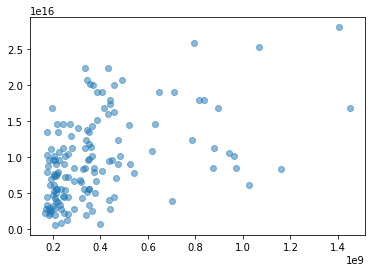

In [ ]:
X, y = movies_intl.drop('worldwide_gross',axis=1), movies_intl['worldwide_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
preds = lm_lasso.predict(X_test)
residuals = preds - y_test
fig, ax = plt.subplots()
ax.scatter(y_test, residuals, alpha = .5)

**Regularization after dropping more outliers**

In [ ]:
movies_2 = movies_intl[movies_intl['worldwide_gross'] < 1000000000]
movies_2.head()

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
index,,,,,,,,,,,,
Despicable Me 2,970766005,2013,76000000,6,98,0,1,1,0,1,0,0
The Lion King,968511805,1994,45000000,6,88,0,1,1,0,0,0,1
Jumanji: Welcome to the Jungle,962102237,2017,90000000,12,119,1,1,0,0,1,0,0
Pirates of the Caribbean: At World's End,960996492,2007,300000000,5,169,1,1,0,0,0,0,0
The Lord of the Rings: The Two Towers,943282270,2002,94000000,12,179,1,1,0,0,0,0,0


In [ ]:
lr_full = LinearRegression()

X = movies_2.drop('worldwide_gross',axis=1)
y = movies_2['worldwide_gross']

lr_full.fit(X, y)
lr_full.score(X, y)

0.2906358659440066

In [ ]:
sm.add_constant(X).head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
index,,,,,,,,,,,,
Despicable Me 2,1.0,2013,76000000,6,98,0,1,1,0,1,0,0
The Lion King,1.0,1994,45000000,6,88,0,1,1,0,0,0,1
Jumanji: Welcome to the Jungle,1.0,2017,90000000,12,119,1,1,0,0,1,0,0
Pirates of the Caribbean: At World's End,1.0,2007,300000000,5,169,1,1,0,0,0,0,0
The Lord of the Rings: The Two Towers,1.0,2002,94000000,12,179,1,1,0,0,0,0,0


In [ ]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     25.18
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           7.42e-44
Time:                        11:10:34   Log-Likelihood:                -13948.
No. Observations:                 688   AIC:                         2.792e+04
Df Residuals:                     676   BIC:                         2.797e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.431e+09   1.65e+09     -0.870      0.385   -4.66e+09     1.8e+09
year           7.119e+05   8.18e+05      0.870      0.384   -8.94e+05    2.32e+06
budget            0.7723      0.151      5.124      0.000       0.476       1.068
release_month -2.303e+06   1.91e+06     -1.205      0.229   -6.06e+06    1.45e+06
runtime        2.252e+06   3.69e+05      6.100      0.000    1.53e+06    2.98e+06
Action         -1.05e+07   1.52e+07     -0.691      0.490   -4.03e+07    1.93e+07
Adventure      7.881e+07   1.62e+07      4.860      0.000     4.7e+07    1.11e+08
Animation      7.606e+07    2.3e+07      3.310      0.001    3.09e+07    1.21e+08
Biography     -3.572e+07   3.16e+07     -1.130      0.259   -9.78e+07    2.63e+07
Comedy         7.922e+06    1.5e+07      0.527      0.598   -2.16e+07    3.74e+07
Crime         -5.358e+07   1.88e+07     -2.843      0.005   -9.06e+07   -1.66e+07
rating_G        6.91e+07   5.17e+07      1.335      0.182   -3.25e+07    1.71e+08
==============================================================================
Omnibus:                      104.152   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.499
Skew:                           1.004   Prob(JB):                     2.32e-35
Kurtosis:                       4.238   Cond. No.                     2.94e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm

## **Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 2.94e+10. This might indicate that there are
strong multicollinearity or other numerical problems.**

In [ ]:
X, y = movies_2.drop('worldwide_gross',axis=1), movies_2['worldwide_gross']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.2934132252047684

In [ ]:
lr.score(X_val, y_val)

0.2892285401885967

In [ ]:
lr.coef_

array([ 2.26796319e+06,  6.28433763e-01, -2.60133540e+06,  2.48409893e+06,
       -1.33903394e+07,  9.51414397e+07,  4.50839117e+07, -5.07333633e+07,
        1.22517497e+07, -5.25000207e+07,  8.88206300e+07])

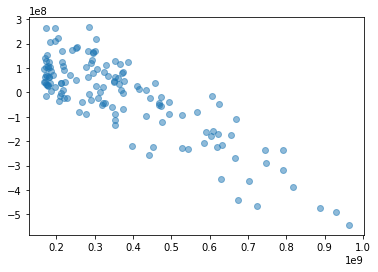

In [ ]:
preds = lr.predict(X_test)
residuals = preds - y_test
fig, ax = plt.subplots()
ax.scatter(y_test, residuals, alpha = .5)

In [ ]:
X, y = movies_2.drop('worldwide_gross',axis=1), movies_2['worldwide_gross']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [ ]:
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)
X_test_scaled = std.transform(X_test.values)
lasso_model = LassoCV()
lasso_model.fit(X_train_scaled, y_train)
lasso_model.score(X_train_scaled, y_train)

0.29161925536266664

In [ ]:
lasso_model.score(X_val_scaled, y_val)

0.28656056419453924

In [ ]:
list(zip(X_train.columns, lasso_model.coef_))

[('year', 14499894.43815873),
 ('budget', 33074348.932195492),
 ('release_month', -5280506.574722517),
 ('runtime', 46074140.09416565),
 ('Action', -3376829.9177559526),
 ('Adventure', 45815925.52969511),
 ('Animation', 15105151.391553221),
 ('Biography', -8676323.922438657),
 ('Comedy', 2913097.6363583473),
 ('Crime', -16024641.734742954),
 ('rating_G', 10968883.73553824)]

In [ ]:
lasso_model.score(X_test_scaled, y_test)

0.25144010668382266

In [ ]:
X_scaled = std.transform(X)
lasso_model.score(X_scaled, y)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.28414172025646156

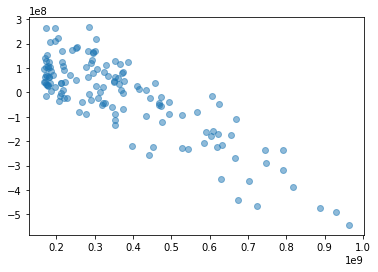

In [ ]:
preds = lr.predict(X_test)
residuals = preds - y_test
fig, ax = plt.subplots()
ax.scatter(y_test, residuals, alpha = .5)

In [ ]:
ridge_model = RidgeCV()
ridge_model.fit(X_train_scaled, y_train)
ridge_model.score(X_train_scaled, y_train)

0.29327585203547846

In [ ]:
ridge_model.score(X_val_scaled, y_val)

0.2895589137973571

In [ ]:
list(zip(X_train.columns, ridge_model.coef_))

[('year', 16423864.493296549),
 ('budget', 33643062.544409454),
 ('release_month', -8018580.599190593),
 ('runtime', 50315573.780160025),
 ('Action', -6158267.638699681),
 ('Adventure', 45975294.98316395),
 ('Animation', 15953233.480527557),
 ('Biography', -10978931.873464137),
 ('Comedy', 5225411.0983943045),
 ('Crime', -17395329.237543374),
 ('rating_G', 12682094.359634787)]

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
lm_poly.score(X_train_poly, y_train)

0.11915649487112034

In [ ]:
lm_poly.score(X_val_poly, y_val)

0.06872206102643763

# **Interpretation of Coefficients**

In [ ]:
movies_2.describe()

,worldwide_gross,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
count,6.880000e+02,688.000000,6.880000e+02,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.493078e+08,2008.172965,9.121392e+07,7.232558,116.075581,0.459302,0.438953,0.135174,0.042151,0.390988,0.126453,0.014535
std,1.832289e+08,7.598400,5.406160e+07,3.279061,20.433799,0.498704,0.496620,0.342159,0.201080,0.488327,0.332602,0.119768
min,1.677394e+08,1973.000000,1.500000e+04,1.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.128418e+08,2003.000000,5.000000e+07,5.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.891018e+08,2009.000000,8.000000e+07,7.000000,113.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.258622e+08,2014.000000,1.300000e+08,10.000000,129.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.707660e+08,2020.000000,3.000000e+08,12.000000,195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
movies_describe = movies_2.drop('worldwide_gross',axis=1).describe()
movies_describe

,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
count,688.000000,6.880000e+02,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,2008.172965,9.121392e+07,7.232558,116.075581,0.459302,0.438953,0.135174,0.042151,0.390988,0.126453,0.014535
std,7.598400,5.406160e+07,3.279061,20.433799,0.498704,0.496620,0.342159,0.201080,0.488327,0.332602,0.119768
min,1973.000000,1.500000e+04,1.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,5.000000e+07,5.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,8.000000e+07,7.000000,113.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,1.300000e+08,10.000000,129.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2020.000000,3.000000e+08,12.000000,195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
movies_describe.loc[['std']]

,year,budget,release_month,runtime,Action,Adventure,Animation,Biography,Comedy,Crime,rating_G
std,7.5984,5.406160e+07,3.279061,20.433799,0.498704,0.49662,0.342159,0.20108,0.488327,0.332602,0.119768


In [ ]:
d = dict(list(zip(X_train.columns, lasso_model.coef_)))
movies_describe = movies_describe.T
movies_describe

,count,mean,std,min,25%,50%,75%,max
year,688.0,2.008173e+03,7.598400e+00,1973.0,2003.0,2009.0,2014.0,2020.0
budget,688.0,9.121392e+07,5.406160e+07,15000.0,50000000.0,80000000.0,130000000.0,300000000.0
release_month,688.0,7.232558e+00,3.279061e+00,1.0,5.0,7.0,10.0,12.0
runtime,688.0,1.160756e+02,2.043380e+01,77.0,100.0,113.5,129.0,195.0
Action,688.0,4.593023e-01,4.987035e-01,0.0,0.0,0.0,1.0,1.0
Adventure,688.0,4.389535e-01,4.966204e-01,0.0,0.0,0.0,1.0,1.0
Animation,688.0,1.351744e-01,3.421585e-01,0.0,0.0,0.0,0.0,1.0
Biography,688.0,4.215116e-02,2.010801e-01,0.0,0.0,0.0,0.0,1.0
Comedy,688.0,3.909884e-01,4.883268e-01,0.0,0.0,0.0,1.0,1.0
Crime,688.0,1.264535e-01,3.326016e-01,0.0,0.0,0.0,0.0,1.0


In [ ]:
movies_describe.drop(['count','mean','min','25%','50%','75%','max'], axis=1, inplace=True)
movies_describe.reset_index(inplace=True)
movies_describe['lasso_coeff'] = movies_describe['index'].map(d)
movies_describe

,index,std,lasso_coeff
0,year,7.598400e+00,1.449989e+07
1,budget,5.406160e+07,3.307435e+07
2,release_month,3.279061e+00,-5.280507e+06
3,runtime,2.043380e+01,4.607414e+07
4,Action,4.987035e-01,-3.376830e+06
5,Adventure,4.966204e-01,4.581593e+07
6,Animation,3.421585e-01,1.510515e+07
7,Biography,2.010801e-01,-8.676324e+06
8,Comedy,4.883268e-01,2.913098e+06
9,Crime,3.326016e-01,-1.602464e+07


In [ ]:
movies_describe['original_scale_coeff'] = (movies_describe['lasso_coeff'])/(movies_describe['std'])
movies_describe

,index,std,lasso_coeff,original_scale_coeff
0,year,7.598400e+00,1.449989e+07,1.908283e+06
1,budget,5.406160e+07,3.307435e+07,6.117900e-01
2,release_month,3.279061e+00,-5.280507e+06,-1.610371e+06
3,runtime,2.043380e+01,4.607414e+07,2.254801e+06
4,Action,4.987035e-01,-3.376830e+06,-6.771217e+06
5,Adventure,4.966204e-01,4.581593e+07,9.225543e+07
6,Animation,3.421585e-01,1.510515e+07,4.414665e+07
7,Biography,2.010801e-01,-8.676324e+06,-4.314859e+07
8,Comedy,4.883268e-01,2.913098e+06,5.965467e+06
9,Crime,3.326016e-01,-1.602464e+07,-4.817970e+07


,index,std,lasso_coeff,original_scale_coeff
0,year,7.598400e+00,1.449989e+07,1.908283e+06
1,budget,5.406160e+07,3.307435e+07,6.117900e-01
2,release_month,3.279061e+00,-5.280507e+06,-1.610371e+06
3,runtime,2.043380e+01,4.607414e+07,2.254801e+06
4,Action,4.987035e-01,-3.376830e+06,-6.771217e+06
5,Adventure,4.966204e-01,4.581593e+07,9.225543e+07
6,Animation,3.421585e-01,1.510515e+07,4.414665e+07
7,Biography,2.010801e-01,-8.676324e+06,-4.314859e+07
8,Comedy,4.883268e-01,2.913098e+06,5.965467e+06
9,Crime,3.326016e-01,-1.602464e+07,-4.817970e+07


In [ ]:
pd.options.display.float_format = '{:.5f}'.format
movies_describe.round(5)

,index,std,lasso_coeff,original_scale_coeff
0,year,7.59840,14499894.43816,1908282.51307
1,budget,54061604.57866,33074348.93220,0.61179
2,release_month,3.27906,-5280506.57472,-1610371.43891
3,runtime,20.43380,46074140.09417,2254800.52417
4,Action,0.49870,-3376829.91776,-6771217.48724
5,Adventure,0.49662,45815925.52970,92255428.00266
6,Animation,0.34216,15105151.39155,44146645.87879
7,Biography,0.20108,-8676323.92244,-43148593.03219
8,Comedy,0.48833,2913097.63636,5965467.40374
9,Crime,0.33260,-16024641.73474,-48179695.85058


In [ ]:
movies_describe.sort_values('original_scale_coeff',ascending=False)

,index,std,lasso_coeff,original_scale_coeff
5,Adventure,0.49662,45815925.52970,92255428.00266
10,rating_G,0.11977,10968883.73554,91584119.39651
6,Animation,0.34216,15105151.39155,44146645.87879
8,Comedy,0.48833,2913097.63636,5965467.40374
3,runtime,20.43380,46074140.09417,2254800.52417
0,year,7.59840,14499894.43816,1908282.51307
1,budget,54061604.57866,33074348.93220,0.61179
2,release_month,3.27906,-5280506.57472,-1610371.43891
4,Action,0.49870,-3376829.91776,-6771217.48724
7,Biography,0.20108,-8676323.92244,-43148593.03219


## **Residuals vs. Predictions**

Text(0.5, 1.0, 'Residuals vs. Predictions')

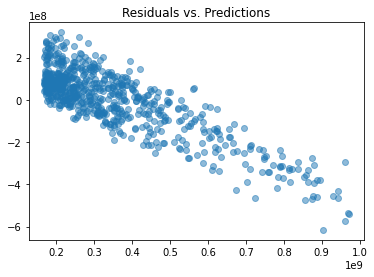

In [ ]:
lr = LinearRegression()
fit = lr.fit(X, y)

preds = lr.predict(X)
residuals = preds - y
fig, ax = plt.subplots()
ax.scatter(y, residuals, alpha = .5)

ax.set_title("Residuals vs. Predictions")

# **RMSE**

In [ ]:
import numpy as np
std_y = 183228936.57687
r_squared = 0.3142810036267232

RMSE = (np.sqrt(1 - r_squared)) * std_y
RMSE

151728495.4907213

In [ ]:
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

159727823.49682856


# LARS Path

In [ ]:
from sklearn.linear_model import lars_path
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [ ]:
X_tr = std.transform(X_train.values)
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


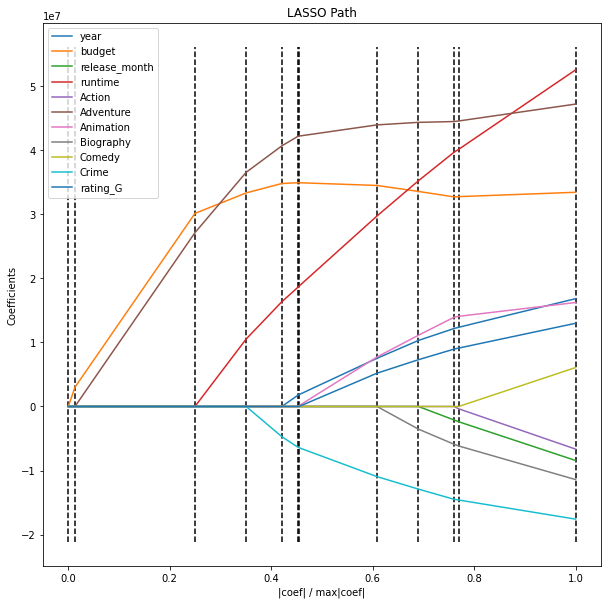

In [ ]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

- Support
Contributions, issues, and feature requests are welcome!

- Give a STAR if you like this project! and FOLLOW do SUPPORT Friends.
 
- I hope you found the project useful and interesting.
- Feel free to contact me if you have any queries or suggestions... 